In [1]:
flights <-read.csv('flights1.csv',sep=',',header = TRUE)

In [2]:
attach(flights)

In [3]:
names(flights)

[1] "DEPARTURE_DELAY" "DISTANCE"        "ARRIVAL_DELAY"   "IF_DELAY"

In [4]:
cor(DEPARTURE_DELAY,ARRIVAL_DELAY)

[1] 0.8875557

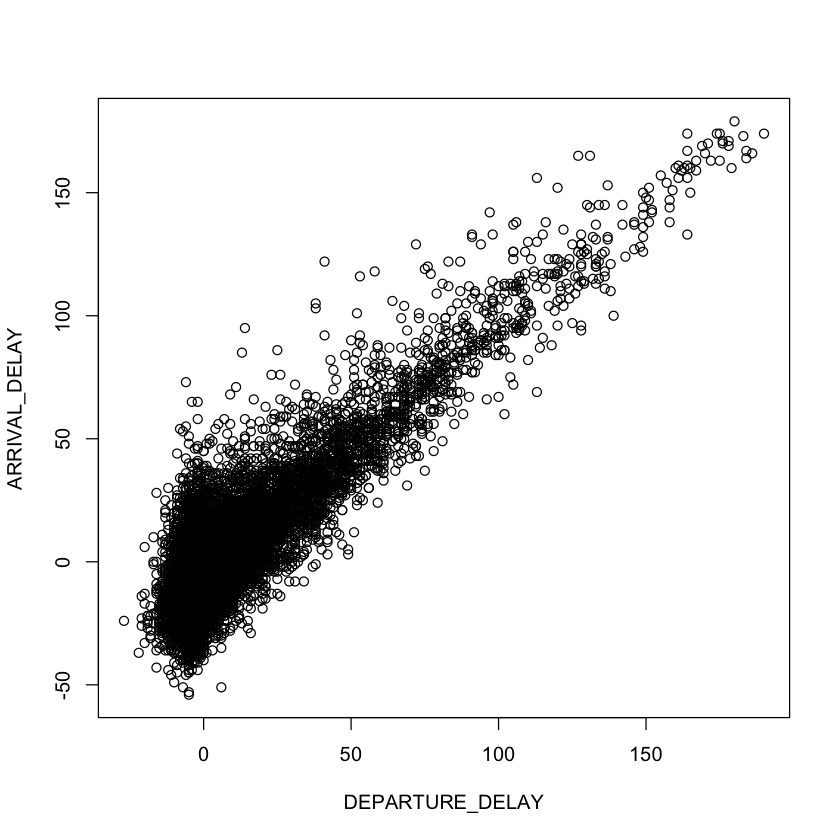

In [5]:
plot(DEPARTURE_DELAY,ARRIVAL_DELAY)

In [6]:
mod <- lm(ARRIVAL_DELAY ~ DEPARTURE_DELAY + DISTANCE, data = flights)

summary(mod)


Call:
lm(formula = ARRIVAL_DELAY ~ DEPARTURE_DELAY + DISTANCE, data = flights)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.764  -7.806  -1.138   6.245  84.897 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.0211053  0.1887875  -10.71   <2e-16 ***
DEPARTURE_DELAY  1.0011257  0.0044497  224.99   <2e-16 ***
DISTANCE        -0.0025560  0.0001731  -14.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.53 on 13398 degrees of freedom
Multiple R-squared:  0.7912,	Adjusted R-squared:  0.7911 
F-statistic: 2.538e+04 on 2 and 13398 DF,  p-value: < 2.2e-16


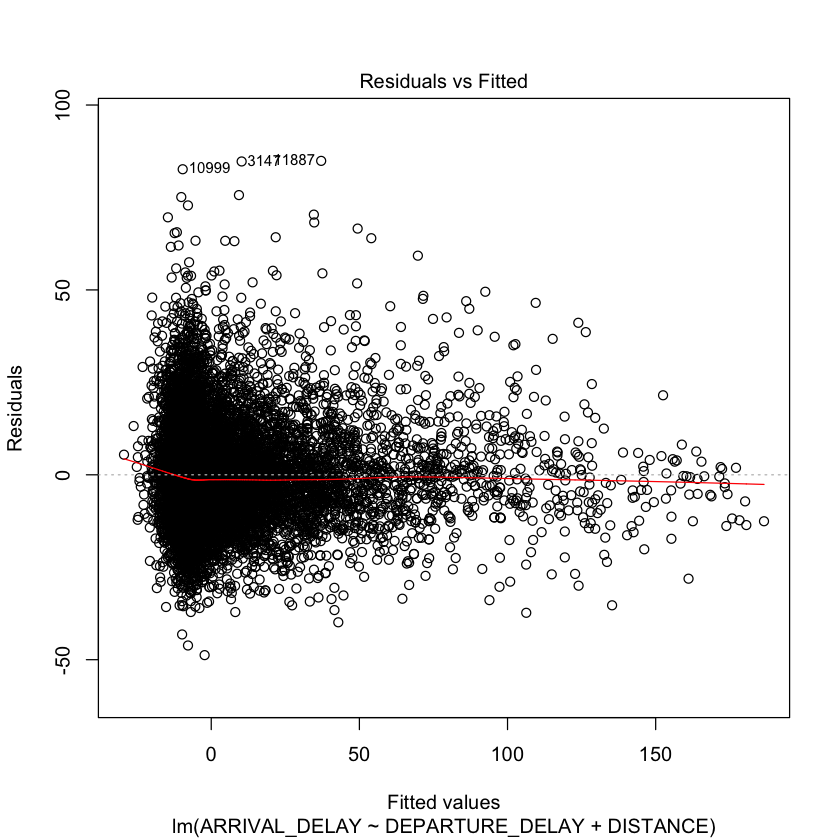

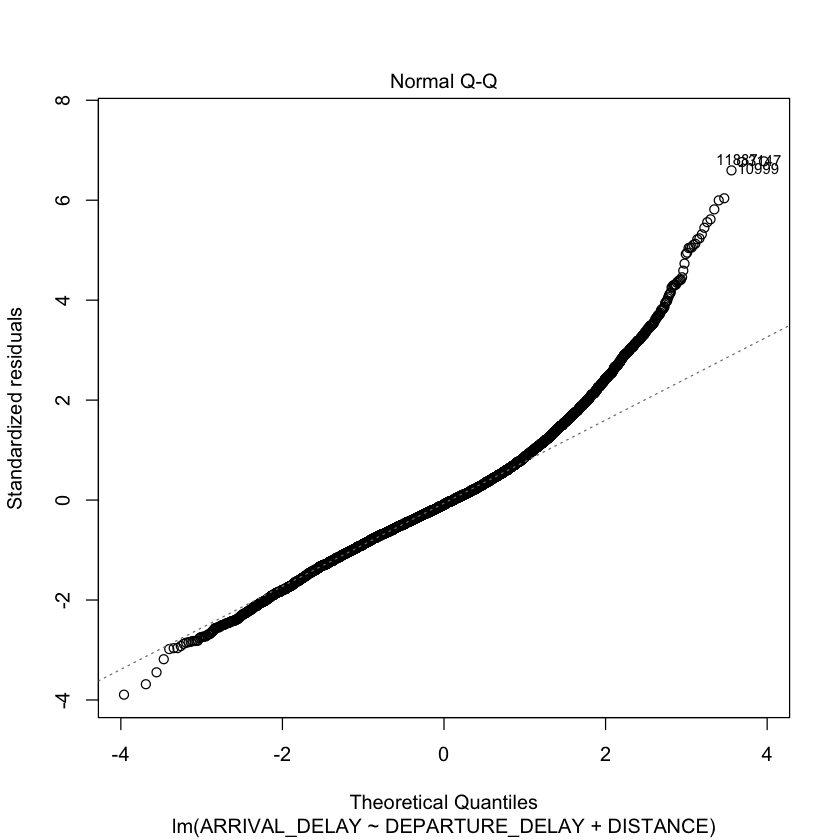

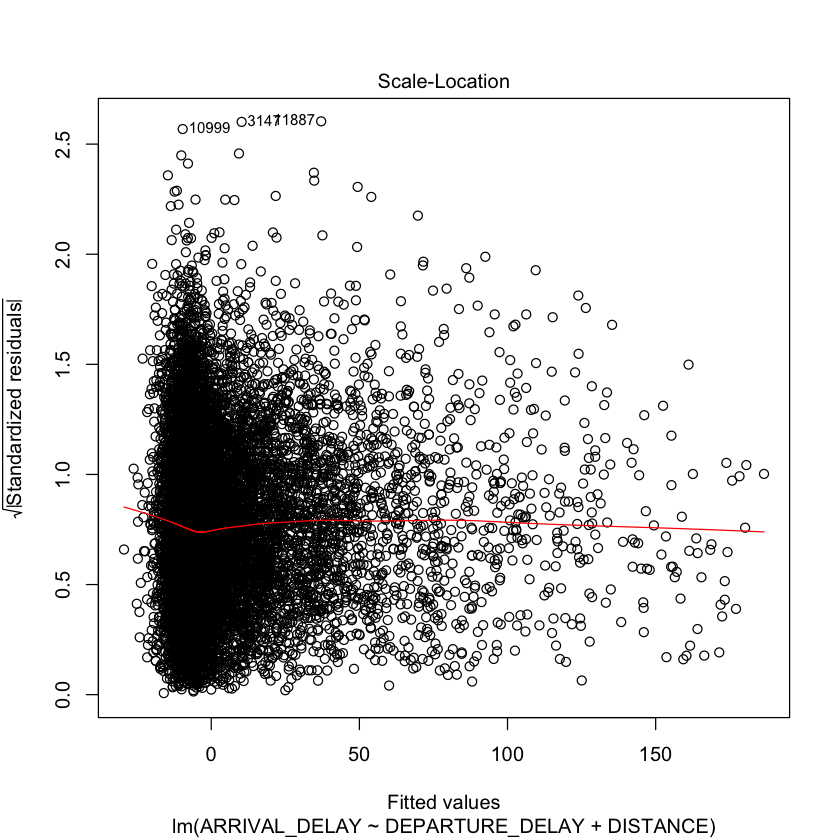

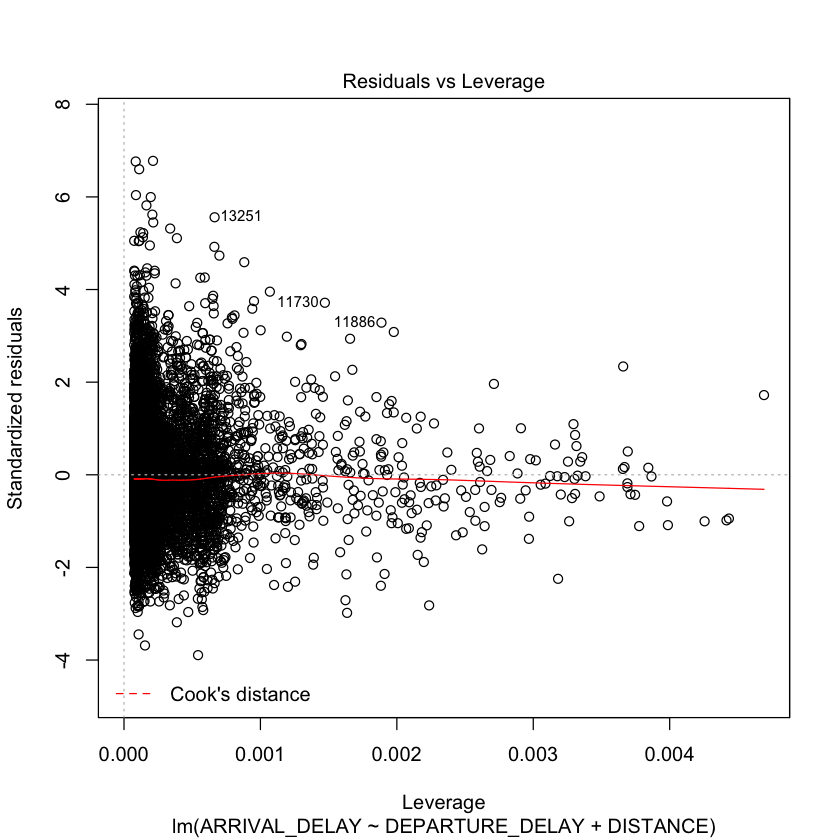

In [7]:
plot(mod)

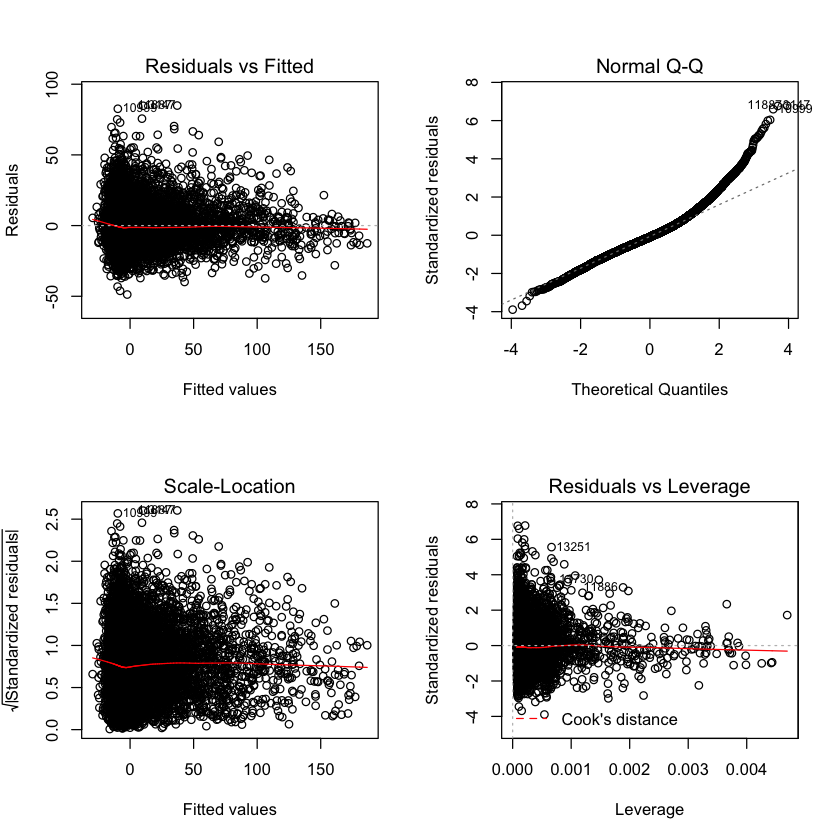

In [8]:
par(mfrow=c(2,2)) 
plot(mod)

In [9]:
library(gvlma)
gvlma(mod)


Call:
lm(formula = ARRIVAL_DELAY ~ DEPARTURE_DELAY + DISTANCE, data = flights)

Coefficients:
    (Intercept)  DEPARTURE_DELAY         DISTANCE  
      -2.021105         1.001126        -0.002556  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = mod) 

                       Value   p-value                   Decision
Global Stat        5113.4752 0.000e+00 Assumptions NOT satisfied!
Skewness           1578.2867 0.000e+00 Assumptions NOT satisfied!
Kurtosis           3488.2897 0.000e+00 Assumptions NOT satisfied!
Link Function         0.2674 6.051e-01    Assumptions acceptable.
Heteroscedasticity   46.6314 8.568e-12 Assumptions NOT satisfied!

In [10]:
library(faraway)
head(flights)

DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,IF_DELAY
-11,1448,-22,0
-8,2330,-9,0
-2,2296,5,0
-5,2342,-9,0
-1,1448,-21,0
-5,1589,8,0


In [11]:
round(cor(flights),2)

,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,IF_DELAY
DEPARTURE_DELAY,1.00,0.01,0.89,0.62
DISTANCE,0.01,1.00,-0.05,0.00
ARRIVAL_DELAY,0.89,-0.05,1.00,0.74
IF_DELAY,0.62,0.00,0.74,1.00


In [12]:
my_model <- lm(ARRIVAL_DELAY~., flights)

In [13]:
summary(my_model)


Call:
lm(formula = ARRIVAL_DELAY ~ ., data = flights)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.149  -6.719  -0.007   6.321  78.092 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -5.5817316  0.1661656  -33.59   <2e-16 ***
DEPARTURE_DELAY  0.7811872  0.0047835  163.31   <2e-16 ***
DISTANCE        -0.0024470  0.0001459  -16.77   <2e-16 ***
IF_DELAY        19.3015217  0.2607551   74.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.55 on 13397 degrees of freedom
Multiple R-squared:  0.8518,	Adjusted R-squared:  0.8517 
F-statistic: 2.566e+04 on 3 and 13397 DF,  p-value: < 2.2e-16


In [14]:
vif(my_model)

DEPARTURE_DELAY        DISTANCE        IF_DELAY 
       1.628541        1.000304        1.628213

In [15]:
pooledSD = sd(flights$DEPARTURE_DELAY) / sd(flights$ARRIVAL_DELAY)

1.0011 * pooledSD

pooledSD1 = sd(flights$DISTANCE) / sd(flights$ARRIVAL_DELAY)

-0.0026 * pooledSD1

[1] 0.8883614

[1] -0.05929186

In [16]:
my_modelS <- lm(scale(flights$ARRIVAL_DELAY) ~ scale(flights$DEPARTURE_DELAY) +
               scale(flights$DISTANCE))

summary(my_modelS)


Call:
lm(formula = scale(flights$ARRIVAL_DELAY) ~ scale(flights$DEPARTURE_DELAY) + 
    scale(flights$DISTANCE))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77913 -0.28478 -0.04151  0.22786  3.09741 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     4.710e-16  3.948e-03    0.00        1    
scale(flights$DEPARTURE_DELAY)  8.884e-01  3.949e-03  224.99   <2e-16 ***
scale(flights$DISTANCE)        -5.829e-02  3.949e-03  -14.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.457 on 13398 degrees of freedom
Multiple R-squared:  0.7912,	Adjusted R-squared:  0.7911 
F-statistic: 2.538e+04 on 2 and 13398 DF,  p-value: < 2.2e-16


In [18]:
library(glmnet)

In [19]:
y = flights$ARRIVAL_DELAY
x = model.matrix(ARRIVAL_DELAY~., data=flights)[,-1]

grid = 10^(seq(10,-2,length = 100))
grid

ridge.model = glmnet(x,y,alpha = 0,lambda = grid)
dim(coef(ridge.model))

[1] 1.000000e+10 7.564633e+09 5.722368e+09 4.328761e+09 3.274549e+09
  [6] 2.477076e+09 1.873817e+09 1.417474e+09 1.072267e+09 8.111308e+08
 [11] 6.135907e+08 4.641589e+08 3.511192e+08 2.656088e+08 2.009233e+08
 [16] 1.519911e+08 1.149757e+08 8.697490e+07 6.579332e+07 4.977024e+07
 [21] 3.764936e+07 2.848036e+07 2.154435e+07 1.629751e+07 1.232847e+07
 [26] 9.326033e+06 7.054802e+06 5.336699e+06 4.037017e+06 3.053856e+06
 [31] 2.310130e+06 1.747528e+06 1.321941e+06 1.000000e+06 7.564633e+05
 [36] 5.722368e+05 4.328761e+05 3.274549e+05 2.477076e+05 1.873817e+05
 [41] 1.417474e+05 1.072267e+05 8.111308e+04 6.135907e+04 4.641589e+04
 [46] 3.511192e+04 2.656088e+04 2.009233e+04 1.519911e+04 1.149757e+04
 [51] 8.697490e+03 6.579332e+03 4.977024e+03 3.764936e+03 2.848036e+03
 [56] 2.154435e+03 1.629751e+03 1.232847e+03 9.326033e+02 7.054802e+02
 [61] 5.336699e+02 4.037017e+02 3.053856e+02 2.310130e+02 1.747528e+02
 [66] 1.321941e+02 1.000000e+02 7.564633e+01 5.722368e+01 4.328761e+01
 [71] 3.274549e+01 2.477076e+01 1.873817e+01 1.417474e+01 1.072267e+01
 [76] 8.111308e+00 6.135907e+00 4.641589e+00 3.511192e+00 2.656088e+00
 [81] 2.009233e+00 1.519911e+00 1.149757e+00 8.697490e-01 6.579332e-01
 [86] 4.977024e-01 3.764936e-01 2.848036e-01 2.154435e-01 1.629751e-01
 [91] 1.232847e-01 9.326033e-02 7.054802e-02 5.336699e-02 4.037017e-02
 [96] 3.053856e-02 2.310130e-02 1.747528e-02 1.321941e-02 1.000000e-02

[1]   4 100

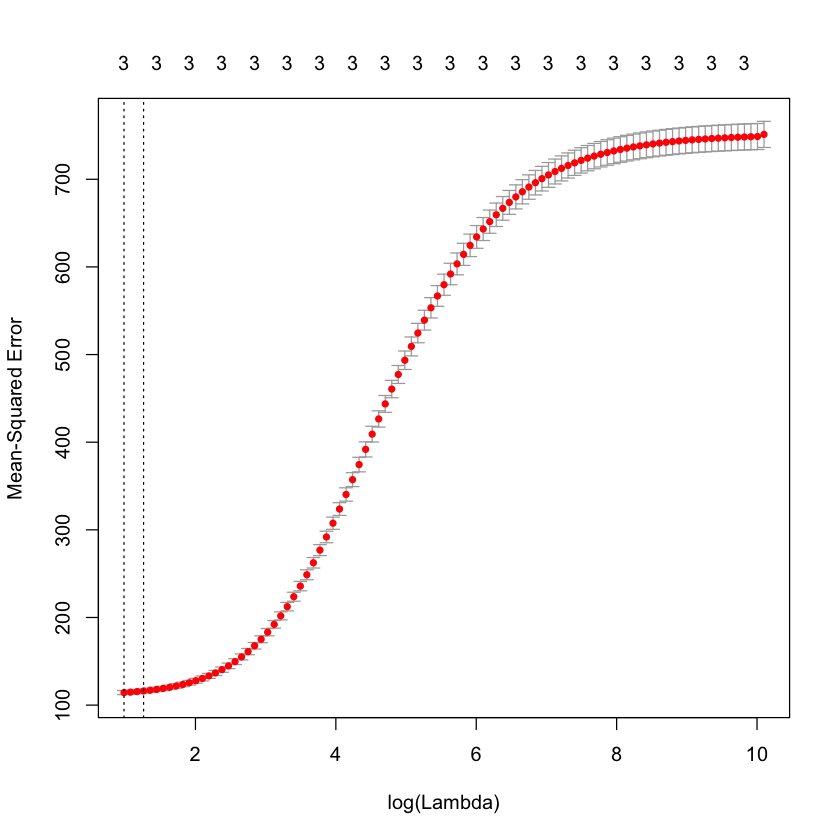

In [20]:
set.seed(10)
cv.out = cv.glmnet(x,y,alpha = 0)
plot(cv.out)